# THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS

## Task 7 : STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS

#### AIM : To create a hybrid model for stock performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

#### Programming Language : Python 3

#### IDE : Jupyter Notebook

#### Dataset used : Historical stock prices : https://finance.yahoo.com/   Textual News Headlines : https://bit.ly/36fFPI6

#### Author Name : Vaishnavi Rathod

## STEPS TO BE FOLLOWED :

#### Step 1 - Downloading Dataset | Loading Datasets | Stock Price Data | Stock News Headlines Data

#### Step 2 - Feature Engineering

#### Step 3 - Finalising Stock Data and writing to Disk

#### Step 4 - Reading Stock Data

#### Step 5 - Feature Engineering of Stock Data

#### Step 6 - EDA of Stock Data

#### Step 7 - Data Preparation for Modelling

#### Step 8 - Setting the Target Variable and the Feature Dataset

#### Step 9 - Stock Data Modelling

#### Step 10 - Predictions

#### Step 11 - Model Evaluation

#### Step 12 - Plotting the Predictions against unseen data


## Step 1 -Downloading Datasets | Stock Price Data | Stock News Headlines Data

In [ ]:
# download nltk if not installed previously
# download tensorflow and keras

In [3]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

In [5]:
# reading the datasets into pandas
stock_price = pd.read_csv('C:\\Users\\Vaishnavi\\OneDrive\\Desktop\\Spark foundation\\HINDUNILVR.NS.csv')
stock_headlines = pd.read_csv('C:\\Users\\Vaishnavi\\OneDrive\\Desktop\\Spark foundation\\india-news-headlines.csv')

In [6]:
# displaying stock price dataset
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,2358.399902,2375.100098,2336.600098,2364.600098,2350.157471,1761632
1,2021-06-15,2360.000000,2395.000000,2360.000000,2391.949951,2377.340332,1215463
2,2021-06-16,2385.000000,2418.850098,2383.649902,2407.899902,2393.192871,2153668
3,2021-06-17,2398.000000,2425.899902,2386.399902,2417.699951,2402.932861,1555777
4,2021-06-18,2420.000000,2496.699951,2405.000000,2482.899902,2467.734619,3937751


In [7]:
# displaying stock news headlines dataset
stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


## Step 2 - Feature Engineering

In [8]:
# displaying number of records in both stock_price and stock_headlines datasets
len(stock_price), len(stock_headlines)

(249, 3650970)

In [9]:
# checking for null values in both the datasets
stock_price.isna().any(), stock_headlines.isna().any()

(Date         False
 Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool,
 publish_date         False
 headline_category    False
 headline_text        False
 dtype: bool)

### 2.1 - Stock Price Data

In [10]:
# dropping duplicates
stock_price = stock_price.drop_duplicates()

# coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()

# filtering the important columns required
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2021-06-14,2364.600098,2358.399902,2375.100098,2336.600098,1761632
2021-06-15,2391.949951,2360.000000,2395.000000,2360.000000,1215463
2021-06-16,2407.899902,2385.000000,2418.850098,2383.649902,2153668
2021-06-17,2417.699951,2398.000000,2425.899902,2386.399902,1555777
2021-06-18,2482.899902,2420.000000,2496.699951,2405.000000,3937751
...,...,...,...,...,...
2022-06-07,2211.600098,2250.000000,2259.850098,2207.050049,2034730
2022-06-08,2197.050049,2215.000000,2218.949951,2186.000000,1506843
2022-06-09,2197.699951,2197.000000,2208.350098,2170.750000,1497867


### 2.2 - Stock News Headlines Data

In [11]:
# dropping duplicates
stock_headlines = stock_headlines.drop_duplicates()

# coverting the datatype of column 'Date' from type string to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()

# filtering the important columns required
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to 'Date'
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
stock_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2022-03-27,Playing a dead man in Body God meant sitting i...
2022-03-28,As fashion becomes democratic; demand for styl...
2022-03-29,Bobby Deol: Like my dad; I hope to be working ...


### 2.3 - Combined Stock Data

In [12]:
# concatenating the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)

# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
stock_data

,Close,Open,High,Low,Volume,headline_text
2021-06-14,2364.600098,2358.399902,2375.100098,2336.600098,1761632.0,"Tips to get radiant skin,Here's why a protein-..."
2021-06-15,2391.949951,2360.000000,2395.000000,2360.000000,1215463.0,"Lucknow: BSc Girl student found murdered,Skin ..."
2021-06-16,2407.899902,2385.000000,2418.850098,2383.649902,2153668.0,Another staff strike hits garbage collection i...
2021-06-17,2417.699951,2398.000000,2425.899902,2386.399902,1555777.0,Micro small and medium enterprises seek permis...
2021-06-18,2482.899902,2420.000000,2496.699951,2405.000000,3937751.0,"5 web series characters serving fashion goals,..."
...,...,...,...,...,...,...
2022-03-25,1953.000000,1974.900024,1977.000000,1945.000000,2233647.0,Speeding up; shortcuts and tackling unruly cus...
2022-03-28,1975.099976,1959.949951,1980.800049,1931.300049,1794533.0,As fashion becomes democratic; demand for styl...
2022-03-29,1987.050049,1980.000000,1994.849976,1974.050049,1249125.0,Bobby Deol: Like my dad; I hope to be working ...
2022-03-30,2015.900024,2000.000000,2019.000000,1995.050049,1476829.0,"I will not give in to trends: Dossmode,The tim..."


### 2.4 - Calculating Sentiment Scores

In [13]:
# adding empty sentiment columns to stock_data for later calculation
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2021-06-14,2364.600098,2358.399902,2375.100098,2336.600098,1761632.0,"Tips to get radiant skin,Here's why a protein-...",,,,
2021-06-15,2391.949951,2360.000000,2395.000000,2360.000000,1215463.0,"Lucknow: BSc Girl student found murdered,Skin ...",,,,
2021-06-16,2407.899902,2385.000000,2418.850098,2383.649902,2153668.0,Another staff strike hits garbage collection i...,,,,
2021-06-17,2417.699951,2398.000000,2425.899902,2386.399902,1555777.0,Micro small and medium enterprises seek permis...,,,,
2021-06-18,2482.899902,2420.000000,2496.699951,2405.000000,3937751.0,"5 web series characters serving fashion goals,...",,,,


In [14]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2021-06-14,2364.600098,2358.399902,2375.100098,2336.600098,1761632.0,"Tips to get radiant skin,Here's why a protein-...",-0.9997,0.124,0.790,0.086
2021-06-15,2391.949951,2360.000000,2395.000000,2360.000000,1215463.0,"Lucknow: BSc Girl student found murdered,Skin ...",-0.9999,0.149,0.783,0.068
2021-06-16,2407.899902,2385.000000,2418.850098,2383.649902,2153668.0,Another staff strike hits garbage collection i...,-0.9996,0.124,0.789,0.087
2021-06-17,2417.699951,2398.000000,2425.899902,2386.399902,1555777.0,Micro small and medium enterprises seek permis...,-0.9999,0.143,0.787,0.070
2021-06-18,2482.899902,2420.000000,2496.699951,2405.000000,3937751.0,"5 web series characters serving fashion goals,...",-0.9998,0.130,0.794,0.076


## Step 3 - Finalising Stock Data and writing to disk

In [15]:
# dropping the 'headline_text' which is unwanted now
stock_data.drop(['headline_text'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2021-06-14,2364.600098,-0.9997,0.124,0.790,0.086,2358.399902,2375.100098,2336.600098,1761632.0
2021-06-15,2391.949951,-0.9999,0.149,0.783,0.068,2360.000000,2395.000000,2360.000000,1215463.0
2021-06-16,2407.899902,-0.9996,0.124,0.789,0.087,2385.000000,2418.850098,2383.649902,2153668.0
2021-06-17,2417.699951,-0.9999,0.143,0.787,0.070,2398.000000,2425.899902,2386.399902,1555777.0
2021-06-18,2482.899902,-0.9998,0.130,0.794,0.076,2420.000000,2496.699951,2405.000000,3937751.0


In [16]:
# writing the prepared stock_data to disk
stock_data.to_csv('stock_data.csv')

## Step 4 - Reading Stock Data   

In [17]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2021-06-14,2364.600098,-0.9997,0.124,0.790,0.086,2358.399902,2375.100098,2336.600098,1761632.0
2021-06-15,2391.949951,-0.9999,0.149,0.783,0.068,2360.000000,2395.000000,2360.000000,1215463.0
2021-06-16,2407.899902,-0.9996,0.124,0.789,0.087,2385.000000,2418.850098,2383.649902,2153668.0
2021-06-17,2417.699951,-0.9999,0.143,0.787,0.070,2398.000000,2425.899902,2386.399902,1555777.0
2021-06-18,2482.899902,-0.9998,0.130,0.794,0.076,2420.000000,2496.699951,2405.000000,3937751.0


## Step 5 - Feature Engineering of Stock Data

In [18]:
# displaying the shape i.e. number of rows and columns of stock_data
stock_data.shape

(200, 9)

In [19]:
# checking for null values
stock_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [20]:
# displaying stock_data statistics
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,2402.931245,-0.979768,0.131990,0.792320,0.075705,2407.743998,2426.996995,2381.030004,1.685313e+06
std,200.944681,0.199267,0.016525,0.020245,0.010677,200.054160,203.737771,200.885172,9.803945e+05
min,1943.949951,-0.999900,0.078000,0.743000,0.051000,1924.550049,1958.000000,1901.550049,2.457190e+05
25%,2306.287476,-0.999900,0.120000,0.777000,0.069000,2307.500000,2324.912476,2283.225037,1.053258e+06
50%,2390.799926,-0.999800,0.134000,0.790000,0.075000,2393.500000,2408.400024,2367.849976,1.479842e+06
75%,2481.962402,-0.999700,0.143000,0.806250,0.082000,2485.750000,2501.200012,2455.049988,1.945958e+06
max,2812.449951,0.999800,0.168000,0.857000,0.124000,2827.899902,2859.300049,2796.649902,6.320118e+06


In [21]:
# displaying stock_data information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 2021-06-14 to 2022-03-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     200 non-null    float64
 1   compound  200 non-null    float64
 2   negative  200 non-null    float64
 3   neutral   200 non-null    float64
 4   positive  200 non-null    float64
 5   Open      200 non-null    float64
 6   High      200 non-null    float64
 7   Low       200 non-null    float64
 8   Volume    200 non-null    float64
dtypes: float64(9)
memory usage: 15.6+ KB


## Step 6 - EDA of Stock Data

Text(0, 0.5, 'Close Price ($)')

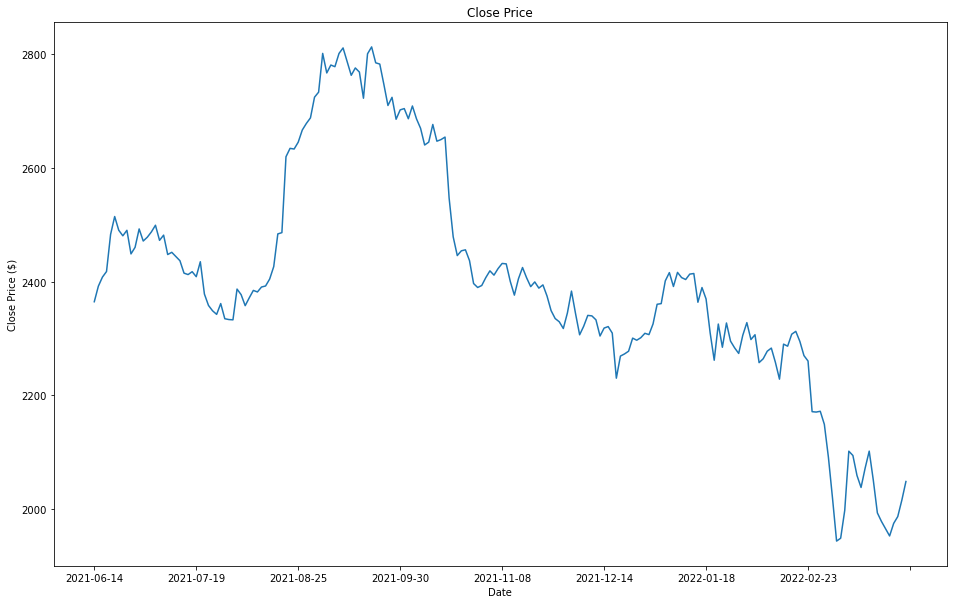

In [22]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [23]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2021-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-22,2438.521415,-0.999757,0.126286,0.798000,0.075571,2416.207136,2453.500000,2402.899972,2.153779e+06
2021-06-23,2455.078543,-0.999786,0.128857,0.796857,0.074143,2435.721436,2473.342843,2420.271380,2.050070e+06
2021-06-24,2469.107108,-0.999786,0.129429,0.794286,0.076143,2454.292864,2489.028564,2436.571394,1.984958e+06


<AxesSubplot:xlabel='Date'>

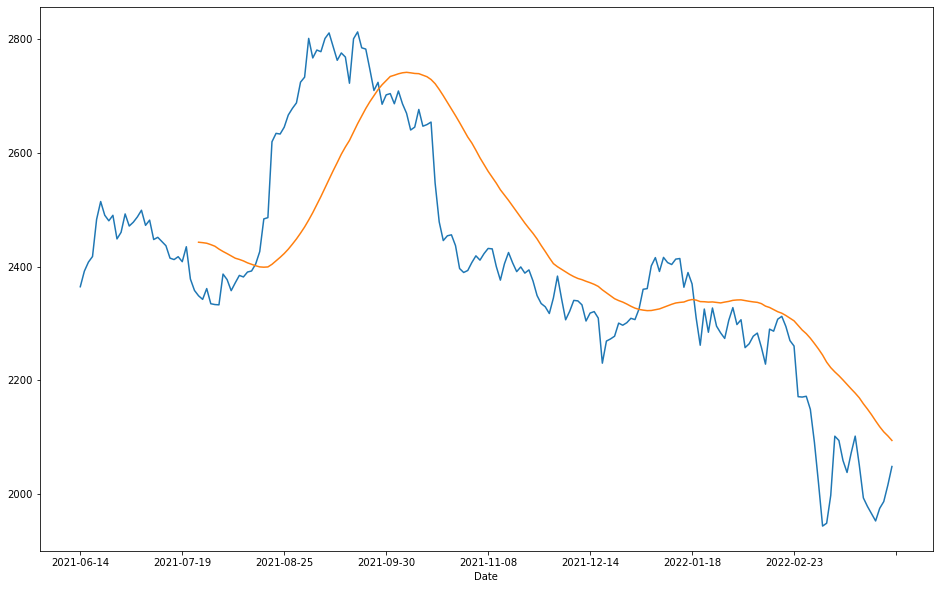

In [24]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [25]:
# displaying stock_data
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2021-06-14,2364.600098,-0.9997,0.124,0.790,0.086,2358.399902,2375.100098,2336.600098,1761632.0
2021-06-15,2391.949951,-0.9999,0.149,0.783,0.068,2360.000000,2395.000000,2360.000000,1215463.0
2021-06-16,2407.899902,-0.9996,0.124,0.789,0.087,2385.000000,2418.850098,2383.649902,2153668.0
2021-06-17,2417.699951,-0.9999,0.143,0.787,0.070,2398.000000,2425.899902,2386.399902,1555777.0
2021-06-18,2482.899902,-0.9998,0.130,0.794,0.076,2420.000000,2496.699951,2405.000000,3937751.0
...,...,...,...,...,...,...,...,...,...
2022-03-25,1953.000000,-0.9999,0.160,0.774,0.066,1974.900024,1977.000000,1945.000000,2233647.0
2022-03-28,1975.099976,-0.9999,0.151,0.763,0.086,1959.949951,1980.800049,1931.300049,1794533.0
2022-03-29,1987.050049,-0.9998,0.131,0.789,0.080,1980.000000,1994.849976,1974.050049,1249125.0


## Step 7 - Data Preparation for Modelling

In [26]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 159
Number of records in Test Data: 41


In [27]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2021-06-15    2391.949951
2021-06-16    2407.899902
2021-06-17    2417.699951
2021-06-18    2482.899902
2021-06-21    2514.350098
                 ...     
2022-03-25    1953.000000
2022-03-28    1975.099976
2022-03-29    1987.050049
2022-03-30    2015.900024
2022-03-31    2048.649902
Name: Close, Length: 199, dtype: float64

In [28]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2021-06-15,2391.949951,2407.899902,-0.9999,-0.9996,1215463.0,2360.000000,2395.000000,2360.000000
2021-06-16,2407.899902,2417.699951,-0.9996,-0.9999,2153668.0,2385.000000,2418.850098,2383.649902
2021-06-17,2417.699951,2482.899902,-0.9999,-0.9998,1555777.0,2398.000000,2425.899902,2386.399902
2021-06-18,2482.899902,2514.350098,-0.9998,-0.9998,3937751.0,2420.000000,2496.699951,2405.000000
2021-06-21,2514.350098,2490.250000,-0.9998,-0.9996,2506277.0,2473.949951,2529.000000,2467.000000
2021-06-22,2490.250000,2480.500000,-0.9996,-0.9999,1945883.0,2518.100098,2533.949951,2481.649902
2021-06-23,2480.500000,2490.149902,-0.9999,-0.9999,1035668.0,2495.000000,2514.000000,2458.199951
2021-06-24,2490.149902,2448.649902,-0.9999,-0.9998,759681.0,2490.000000,2504.800049,2474.100098
2021-06-25,2448.649902,2460.199951,-0.9998,-0.9998,1112942.0,2488.000000,2489.949951,2445.000000


## Step 8 - Setting the Target Variable and the Feature Dataset

In [29]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2021-06-15    2407.899902
2021-06-16    2417.699951
2021-06-17    2482.899902
2021-06-18    2514.350098
2021-06-21    2490.250000
                 ...     
2022-03-24    1953.000000
2022-03-25    1975.099976
2022-03-28    1987.050049
2022-03-29    2015.900024
2022-03-30    2048.649902
Name: close_price_shifted, Length: 198, dtype: float64

In [30]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x


,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2021-06-15,2391.949951,-0.9999,-0.9996,1215463.0,2360.000000,2395.000000,2360.000000
2021-06-16,2407.899902,-0.9996,-0.9999,2153668.0,2385.000000,2418.850098,2383.649902
2021-06-17,2417.699951,-0.9999,-0.9998,1555777.0,2398.000000,2425.899902,2386.399902
2021-06-18,2482.899902,-0.9998,-0.9998,3937751.0,2420.000000,2496.699951,2405.000000
2021-06-21,2514.350098,-0.9998,-0.9996,2506277.0,2473.949951,2529.000000,2467.000000
...,...,...,...,...,...,...,...
2022-03-24,1965.900024,-0.9999,-0.9999,3054664.0,1970.000000,1991.349976,1951.349976
2022-03-25,1953.000000,-0.9999,-0.9999,2233647.0,1974.900024,1977.000000,1945.000000
2022-03-28,1975.099976,-0.9999,-0.9998,1794533.0,1959.949951,1980.800049,1931.300049


### 8.1 Scaling the Target Variable and the Feature Dataset 

In [31]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[ 0.03166379, -1.        , -0.99969995, ..., -0.0359218 ,
         -0.03028963,  0.02435488],
        [ 0.06839367, -0.99969995, -1.        , ...,  0.01942774,
          0.02263414,  0.07719793],
        [ 0.09096143, -1.        , -0.99989998, ...,  0.0482095 ,
          0.03827777,  0.08334249],
        ...,
        [-0.92826707, -1.        , -0.99989998, ..., -0.92162527,
         -0.94940631, -0.93352697],
        [-0.90074819, -0.99989998, -1.        , ..., -0.87723483,
         -0.91822928, -0.8380069 ],
        [-0.83431186, -1.        , -1.        , ..., -0.83295519,
         -0.86463997, -0.79108476]]),
 array([[ 6.83936695e-02],
        [ 9.09614277e-02],
        [ 2.41105241e-01],
        [ 3.13529412e-01],
        [ 2.58031201e-01],
        [ 2.35578697e-01],
        [ 2.57800693e-01],
        [ 1.62233623e-01],
        [ 1.88831318e-01],
        [ 2.63327802e-01],
        [ 2.14392857e-01],
        [ 2.29821644e-01],
        [ 2.51237992e-01],
        [ 2.78296138e-

### 8.2 Dividing the dataset into Training and Test

Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [32]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (159, 7) and y: (159, 1)
Number of rows and columns in the Test set X: (38, 7) and y: (38, 1)


### 8.3 Reshaping the Feature Dataset

In [33]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (159, 7, 1)
Shape of Test set X: (38, 7, 1)


## Step - 9 Stock Data Modelling

In [34]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 7, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 100)            80400     
                                                                 
 dropout_1 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [35]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
16/16 [==============================] - 10s 113ms/step - loss: 0.1673 - val_loss: 0.1063
Epoch 2/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0868 - val_loss: 0.0649
Epoch 3/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0268 - val_loss: 0.0759
Epoch 4/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0241 - val_loss: 0.0725
Epoch 5/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0234 - val_loss: 0.0782
Epoch 6/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0253 - val_loss: 0.0522
Epoch 7/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0229 - val_loss: 0.0591
Epoch 8/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0202 - val_loss: 0.0525
Epoch 9/10
16/16 [==============================] - 0s 14ms/step - loss: 0.0224 - val_loss: 0.0569
Epoch 10/10
16/16 [==============================] - 0s 13ms/step - loss: 0.0193 - val_loss: 0.0561


### 9.1 Saving the Model to disk

In [36]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model.h5')
print('Model is saved to the disk')

Model is saved to the disk


## Step - 10 Predictions

In [37]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

2/2 [==============================] - 2s 5ms/step
Predictions:


array([[2323.5178],
       [2311.6848],
       [2286.0176],
       [2283.0273],
       [2287.8308]], dtype=float32)

## Step - 11 Model Evaluation

In [38]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

38/38 [==============================] - 0s 3ms/step - loss: 0.0663
Train Loss = 0.025
Test Loss = 0.0663


In [39]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4

SyntaxError: unexpected EOF while parsing (1223541199.py, line 3)

In [40]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 2218.8755


## Step - 12 Plotting the Predictions against unseen data

In [41]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

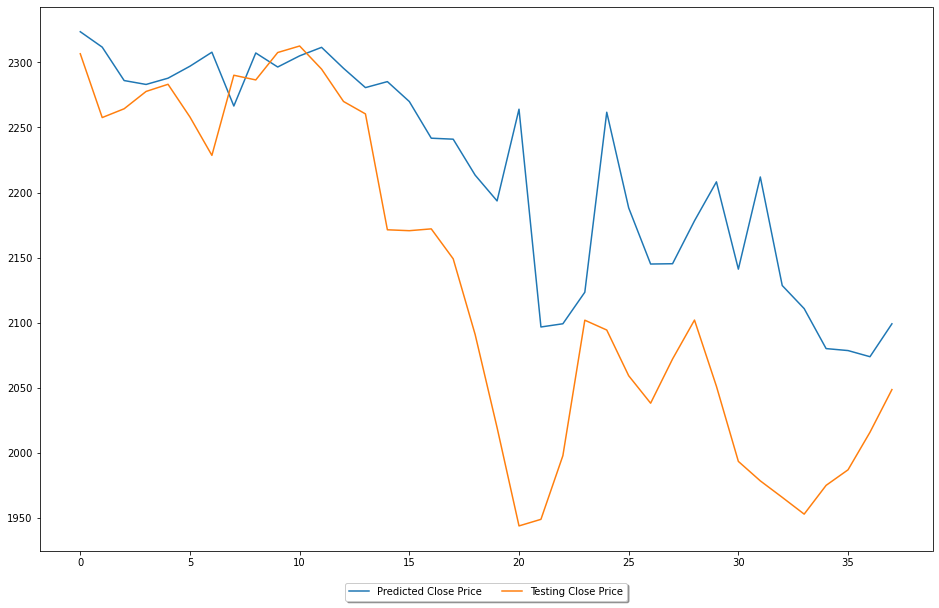

In [42]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()